In [1]:
%matplotlib inline

# Finalizing Model Data

Code for finalizing the model data  
_Author: Jimmy Charité_  
_Email: jimmy.charite@gmail.com_  
_Date: April 22, 2017_  

# Directory & Packages

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import pysentiment
from textstat.textstat import textstat 
from wordcloud import WordCloud
import nltk
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
retval=os.chdir("..")

# Helper Functions

In [4]:
def pd_tab(df,col,sort_by='count',asc=False):
    tab=df[col].value_counts(dropna=False).reset_index(name='count')
    tab.columns=[col,'count']
    tab['percent']=tab['count']/tab['count'].sum()
    tab.sort_values(by=sort_by,inplace=True,ascending=asc)
    return tab

# Upload Data

In [5]:
raw_data=pd.read_pickle('./clean_data/raw_data_post_parse.pkl')
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,vec299,num_sents,num_words,readability,sentiment_dict,neg_senti,pos_senti,neu_senti,comp_senti,text_lemma
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,0.012566,2,37,8.0,"{'pos': 0.068, 'neu': 0.853, 'neg': 0.079, 'co...",0.079,0.068,0.853,-0.1027,product arrive label peanut actually small siz...
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,...,0.004194,4,35,1.3,"{'pos': 0.448, 'neu': 0.552, 'neg': 0.0, 'comp...",0.000,0.448,0.552,0.9468,great taffy great price wide assortment yummy ...
2,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,...,-0.006151,5,90,8.6,"{'pos': 0.163, 'neu': 0.809, 'neg': 0.029, 'co...",0.029,0.163,0.809,0.8830,get wild hair taffy order pound bag taffy enjo...
3,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,...,0.006221,5,63,7.7,"{'pos': 0.273, 'neu': 0.693, 'neg': 0.034, 'co...",0.034,0.273,0.693,0.9346,saltwater taffy great flavor soft chewy candy ...
4,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,...,0.002562,5,34,3.8,"{'pos': 0.48, 'neu': 0.52, 'neg': 0.0, 'compou...",0.000,0.480,0.520,0.9487,taffy good soft chewy flavor amazing definitel...


### Finalizing Features

In [6]:
raw_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       ...
       'vec299', 'num_sents', 'num_words', 'readability', 'sentiment_dict',
       'neg_senti', 'pos_senti', 'neu_senti', 'comp_senti', 'text_lemma'],
      dtype='object', length=327)

In [7]:
fin_cols=['helpful','num_sents', 'num_words', 'readability',
          'neg_senti', 'pos_senti', 'neu_senti', 'comp_senti',
          'text_lemma']
vec_cols=[s for s in raw_data.columns if s[:3]=='vec']
fin_cols.extend(vec_cols)
fin_cols

['helpful',
 'num_sents',
 'num_words',
 'readability',
 'neg_senti',
 'pos_senti',
 'neu_senti',
 'comp_senti',
 'text_lemma',
 'vec0',
 'vec1',
 'vec2',
 'vec3',
 'vec4',
 'vec5',
 'vec6',
 'vec7',
 'vec8',
 'vec9',
 'vec10',
 'vec11',
 'vec12',
 'vec13',
 'vec14',
 'vec15',
 'vec16',
 'vec17',
 'vec18',
 'vec19',
 'vec20',
 'vec21',
 'vec22',
 'vec23',
 'vec24',
 'vec25',
 'vec26',
 'vec27',
 'vec28',
 'vec29',
 'vec30',
 'vec31',
 'vec32',
 'vec33',
 'vec34',
 'vec35',
 'vec36',
 'vec37',
 'vec38',
 'vec39',
 'vec40',
 'vec41',
 'vec42',
 'vec43',
 'vec44',
 'vec45',
 'vec46',
 'vec47',
 'vec48',
 'vec49',
 'vec50',
 'vec51',
 'vec52',
 'vec53',
 'vec54',
 'vec55',
 'vec56',
 'vec57',
 'vec58',
 'vec59',
 'vec60',
 'vec61',
 'vec62',
 'vec63',
 'vec64',
 'vec65',
 'vec66',
 'vec67',
 'vec68',
 'vec69',
 'vec70',
 'vec71',
 'vec72',
 'vec73',
 'vec74',
 'vec75',
 'vec76',
 'vec77',
 'vec78',
 'vec79',
 'vec80',
 'vec81',
 'vec82',
 'vec83',
 'vec84',
 'vec85',
 'vec86',
 'vec87',
 '

In [8]:
raw_data=raw_data[fin_cols].copy()

In [9]:
raw_data.head()

,helpful,num_sents,num_words,readability,neg_senti,pos_senti,neu_senti,comp_senti,text_lemma,vec0,...,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
0,0.0,2,37,8.0,0.079,0.068,0.853,-0.1027,product arrive label peanut actually small siz...,0.037825,...,-0.015524,0.009058,0.020853,-0.058746,-0.001076,-0.013715,-0.035464,0.006317,0.023066,0.012566
1,0.0,4,35,1.3,0.000,0.448,0.552,0.9468,great taffy great price wide assortment yummy ...,0.043776,...,-0.010004,-0.003239,0.014308,-0.050601,-0.024100,-0.023046,-0.017151,0.017009,0.010729,0.004194
2,0.0,5,90,8.6,0.029,0.163,0.809,0.8830,get wild hair taffy order pound bag taffy enjo...,0.060040,...,-0.019251,-0.003896,-0.006812,-0.055859,-0.005714,-0.024808,-0.040370,0.012168,0.025422,-0.006151
3,0.0,5,63,7.7,0.034,0.273,0.693,0.9346,saltwater taffy great flavor soft chewy candy ...,0.039160,...,-0.011348,0.001603,0.005117,-0.039322,-0.005104,-0.032976,-0.014450,0.013952,0.020636,0.006221
4,0.0,5,34,3.8,0.000,0.480,0.520,0.9487,taffy good soft chewy flavor amazing definitel...,0.044667,...,-0.012392,0.000802,0.000560,-0.046236,0.000751,-0.025405,-0.014135,0.013558,0.014956,0.002562


#### Number of Sentences

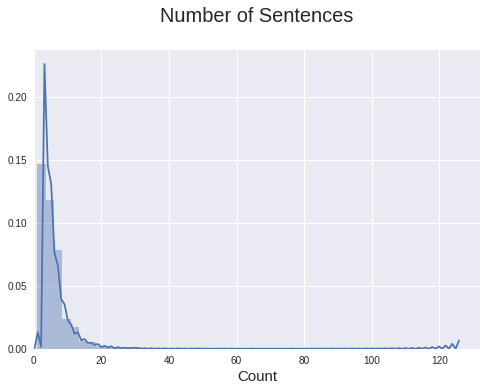

In [10]:
g=sns.distplot(raw_data.num_sents)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number of Sentences\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

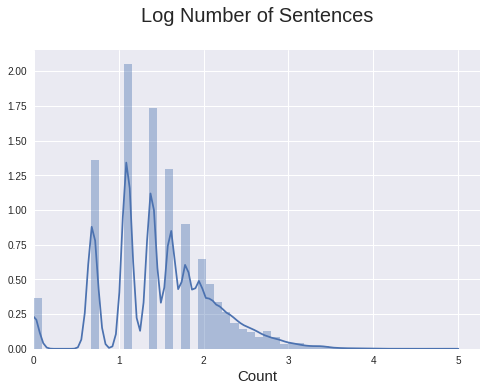

In [11]:
g=sns.distplot(np.log(raw_data.num_sents))
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Log Number of Sentences\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

Will use the log b/c of extreme skewness

In [12]:
raw_data['num_sents']=np.log(raw_data.num_sents)

#### Number of Words

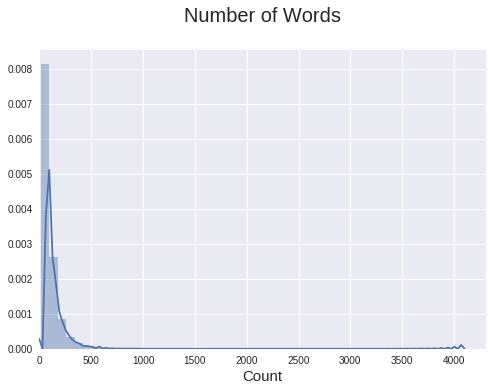

In [13]:
g=sns.distplot(raw_data.num_words)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number of Words\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

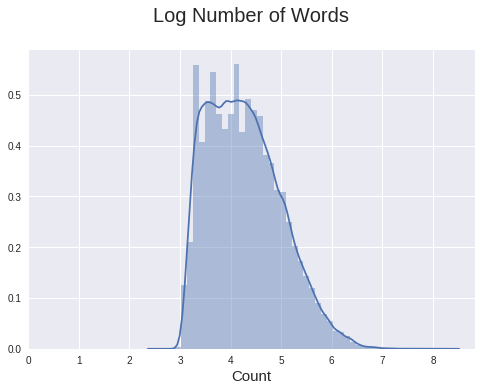

In [14]:
g=sns.distplot(np.log(raw_data.num_words))
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Log Number of Words\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

In [15]:
raw_data['num_words']=np.log(raw_data.num_words)

#### Readability

In [16]:
raw_data.readability.describe()

count    198659.000000
mean          6.511867
std           3.538556
min          -8.400000
25%           4.300000
50%           6.100000
75%           8.200000
max         345.600000
Name: readability, dtype: float64

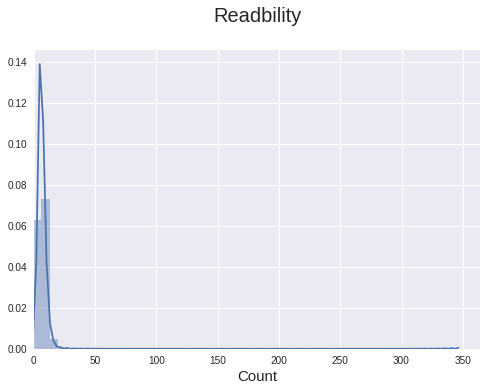

In [17]:
g=sns.distplot(raw_data.readability)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Readbility\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

In [18]:
raw_data.readability.isnull().sum()

0

In retrospect, this seems less appropriate. However, I will just shift it to make it positive, then take the log

In [19]:
raw_data['readability']=np.log(raw_data.readability+100*np.abs(np.min(raw_data.readability)))

In [20]:
raw_data.readability.describe()

count    198659.000000
mean          6.741116
std           0.004127
min           6.723352
25%           6.738508
50%           6.740638
75%           6.743116
max           7.078004
Name: readability, dtype: float64

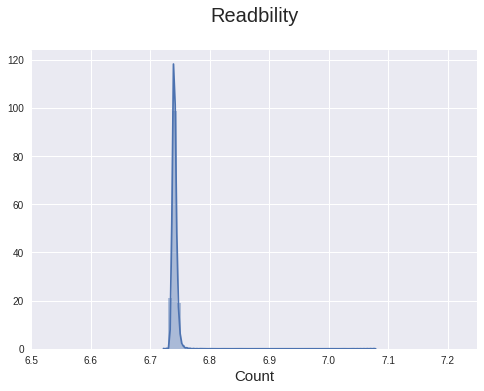

In [21]:
g=sns.distplot(raw_data.readability)
g.axes.set_ylim(0,)
g.axes.set_xlim(6.5,7.25)
g.axes.set_title('Readbility\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

This comically thin distribution will be adjusted with scaling

#### Sentiment

In [22]:
raw_data.neg_senti.describe()

count    198659.000000
mean          0.042783
std           0.051858
min           0.000000
25%           0.000000
50%           0.029000
75%           0.067000
max           0.602000
Name: neg_senti, dtype: float64

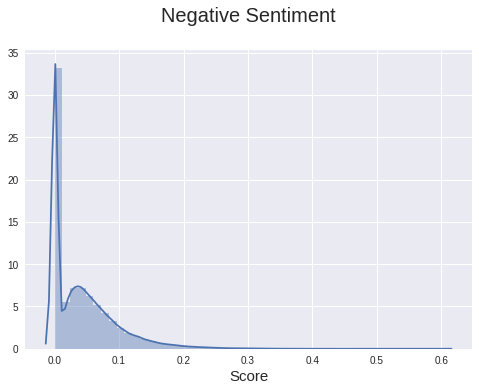

In [23]:
g=sns.distplot(raw_data.neg_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Negative Sentiment\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

In [24]:
raw_data.pos_senti.describe()

count    198659.000000
mean          0.190410
std           0.106408
min           0.000000
25%           0.114000
50%           0.176000
75%           0.255000
max           0.964000
Name: pos_senti, dtype: float64

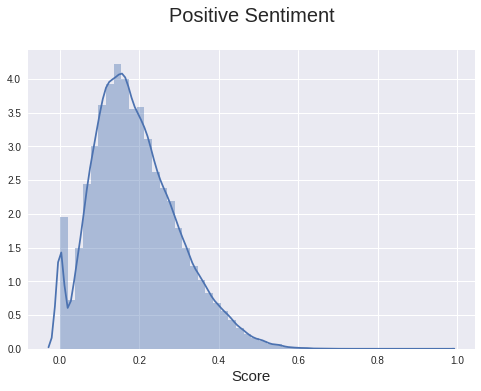

In [25]:
g=sns.distplot(raw_data.pos_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Positive Sentiment\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

In [26]:
raw_data.neu_senti.describe()

count    198659.000000
mean          0.766808
std           0.100348
min           0.036000
25%           0.705000
50%           0.777000
75%           0.837000
max           1.000000
Name: neu_senti, dtype: float64

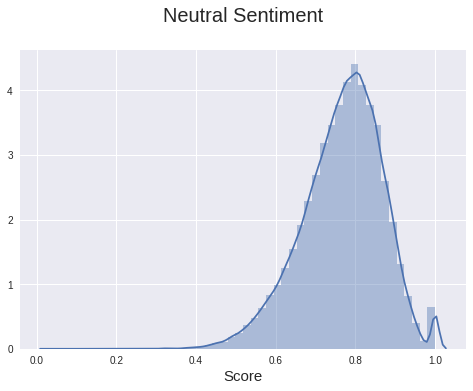

In [27]:
g=sns.distplot(raw_data.neu_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Neutral Sentiment\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

In [28]:
raw_data.comp_senti.describe()

count    198659.000000
mean          0.643758
std           0.473820
min          -0.998300
25%           0.573700
50%           0.855500
75%           0.942800
max           0.999800
Name: comp_senti, dtype: float64

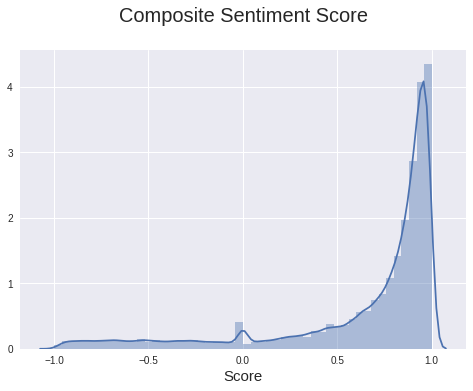

In [29]:
g=sns.distplot(raw_data.comp_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Composite Sentiment Score\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

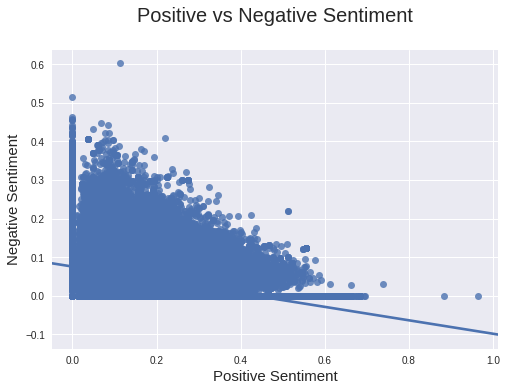

In [30]:
g=sns.regplot(x="pos_senti", y="neg_senti", data=raw_data,
             fit_reg=True)
#g.axes.set_ylim(0,)
#g.axes.set_xlim(0,)
g.axes.set_title('Positive vs Negative Sentiment\n',fontsize=20)
g.set_xlabel('Positive Sentiment',fontsize=15)
g.set_ylabel('Negative Sentiment',fontsize=15)

In [31]:
f='pos_senti ~ neg_senti'
results = smf.ols(formula=f, data=raw_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              pos_senti   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Mon, 24 Apr 2017   Prob (F-statistic):               0.00
Time:                        00:41:58   Log-Likelihood:             1.7677e+05
No. Observations:              198659   AIC:                        -3.535e+05
Df Residuals:                  198657   BIC:                        -3.535e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2218      0.000    767.157      0.0

I expected a larger R^2

In [32]:
sns.set(context="paper", font="monospace")

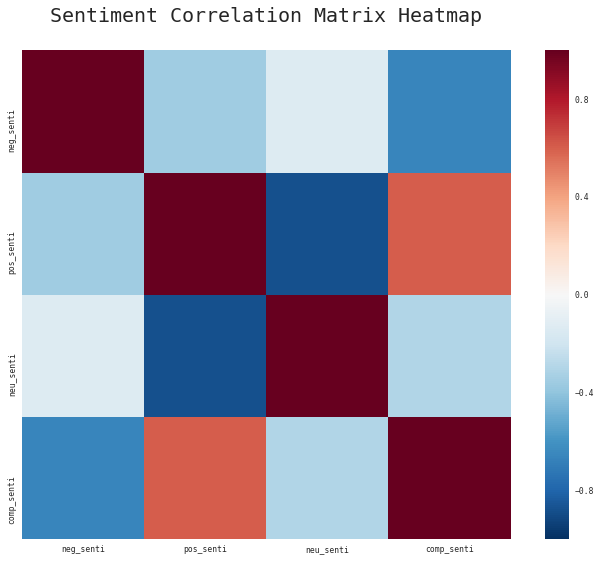

In [33]:
corrmat = raw_data[['neg_senti', 'pos_senti', 'neu_senti', 'comp_senti']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True)
ax.set_title('Sentiment Correlation Matrix Heatmap\n',fontsize=20)
plt.savefig('./plots/Sentiment_Correlation_Matrix_Heatmap.png', bbox_inches='tight')

In [34]:
corrmat

,neg_senti,pos_senti,neu_senti,comp_senti
neg_senti,1.000000,-0.357215,-0.137975,-0.660156
pos_senti,-0.357215,1.000000,-0.875795,0.604832
neu_senti,-0.137975,-0.875795,1.000000,-0.300230
comp_senti,-0.660156,0.604832,-0.300230,1.000000


Will use just positive and negative sentiment

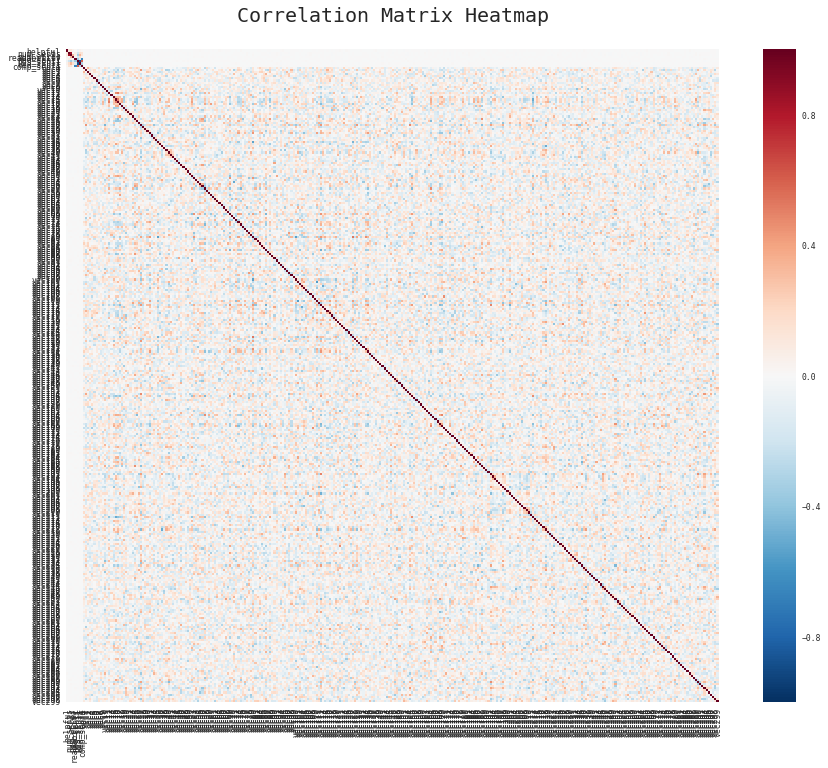

In [35]:
corrmat = raw_data[[s for s in raw_data.columns if s!='text_lemma']].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=1, square=True)
ax.set_title('Correlation Matrix Heatmap\n',fontsize=20)
plt.savefig('./plots/Correlation_Matrix_Heatmap.png', bbox_inches='tight')

In [36]:
corrmat

,helpful,num_sents,num_words,readability,neg_senti,pos_senti,neu_senti,comp_senti,vec0,vec1,...,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
helpful,1.000000,0.101121,0.117066,0.045658,0.011926,-0.047856,0.044605,0.014827,-0.001996,0.003036,...,-0.002606,-0.003963,-0.000643,-0.003781,-0.007364,-0.004958,0.004556,0.006280,0.000212,-0.002604
num_sents,0.101121,1.000000,0.845799,-0.013122,0.072884,-0.204951,0.179637,0.133330,-0.002010,-0.001960,...,-0.005676,0.005320,0.004799,0.002927,0.006171,0.004959,0.000067,0.002998,0.003348,-0.000870
num_words,0.117066,0.845799,1.000000,0.323695,0.068369,-0.346604,0.332172,0.122083,0.001518,-0.005018,...,-0.006187,0.008106,0.006167,0.001175,0.003239,0.002929,-0.002252,0.002194,0.001832,-0.005015
readability,0.045658,-0.013122,0.323695,1.000000,0.016646,-0.168780,0.170328,0.007755,0.004788,-0.003243,...,-0.003433,0.006384,-0.002390,-0.002450,-0.007327,-0.003110,-0.000226,0.001678,-0.000972,-0.002740
neg_senti,0.011926,0.072884,0.068369,0.016646,1.000000,-0.357215,-0.137975,-0.660156,-0.000336,0.000851,...,-0.000301,0.000191,-0.002866,0.008277,0.000067,-0.000566,0.000304,0.000136,0.002086,0.000665
pos_senti,-0.047856,-0.204951,-0.346604,-0.168780,-0.357215,1.000000,-0.875795,0.604832,-0.003488,0.001524,...,-0.000896,-0.003316,0.000179,-0.008143,-0.000810,-0.000529,0.002812,-0.001904,-0.003080,-0.001522
neu_senti,0.044605,0.179637,0.332172,0.170328,-0.137975,-0.875795,1.000000,-0.300230,0.003889,-0.002041,...,0.001113,0.003414,0.001301,0.004347,0.000817,0.000876,-0.003120,0.001954,0.002190,0.001270
comp_senti,0.014827,0.133330,0.122083,0.007755,-0.660156,0.604832,-0.300230,1.000000,-0.002728,-0.004344,...,-0.003408,0.002522,0.000745,-0.009405,0.003368,0.002774,0.001533,0.003527,0.000582,-0.003039
vec0,-0.001996,-0.002010,0.001518,0.004788,-0.000336,-0.003488,0.003889,-0.002728,1.000000,0.049749,...,-0.096294,0.119042,0.084800,-0.166810,-0.090917,0.038385,-0.020475,0.066057,-0.051663,0.096985
vec1,0.003036,-0.001960,-0.005018,-0.003243,0.000851,0.001524,-0.002041,-0.004344,0.049749,1.000000,...,0.327694,-0.083522,-0.025924,0.179705,0.049795,-0.074818,0.138793,0.107337,-0.283057,0.006003


In [37]:
raw_data=raw_data[fin_cols].copy()

In [38]:
raw_data.head()

,helpful,num_sents,num_words,readability,neg_senti,pos_senti,neu_senti,comp_senti,text_lemma,vec0,...,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
0,0.0,0.693147,3.610918,6.742881,0.079,0.068,0.853,-0.1027,product arrive label peanut actually small siz...,0.037825,...,-0.015524,0.009058,0.020853,-0.058746,-0.001076,-0.013715,-0.035464,0.006317,0.023066,0.012566
1,0.0,1.386294,3.555348,6.734948,0.000,0.448,0.552,0.9468,great taffy great price wide assortment yummy ...,0.043776,...,-0.010004,-0.003239,0.014308,-0.050601,-0.024100,-0.023046,-0.017151,0.017009,0.010729,0.004194
2,0.0,1.609438,4.499810,6.743588,0.029,0.163,0.809,0.8830,get wild hair taffy order pound bag taffy enjo...,0.060040,...,-0.019251,-0.003896,-0.006812,-0.055859,-0.005714,-0.024808,-0.040370,0.012168,0.025422,-0.006151
3,0.0,1.609438,4.143135,6.742527,0.034,0.273,0.693,0.9346,saltwater taffy great flavor soft chewy candy ...,0.039160,...,-0.011348,0.001603,0.005117,-0.039322,-0.005104,-0.032976,-0.014450,0.013952,0.020636,0.006221
4,0.0,1.609438,3.526361,6.737915,0.000,0.480,0.520,0.9487,taffy good soft chewy flavor amazing definitel...,0.044667,...,-0.012392,0.000802,0.000560,-0.046236,0.000751,-0.025405,-0.014135,0.013558,0.014956,0.002562


In [39]:
raw_data.to_pickle('./clean_data/clean_data.pkl')

### The Obligatory NLP Word Clouds

All Reviews

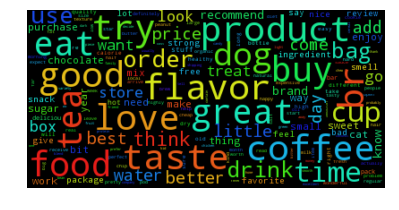

In [57]:
text=' '.join(raw_data.text_lemma)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./plots/all_reviews_word_cloud.png', bbox_inches='tight')
plt.show()

Helpful Reviews

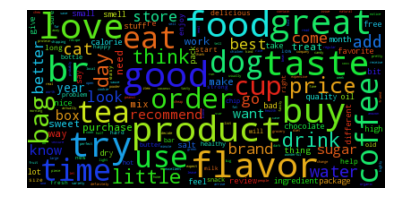

In [56]:
text=' '.join(raw_data[raw_data.helpful==1].text_lemma)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./plots/helpful_reviews_word_cloud.png', bbox_inches='tight')
plt.show()

Unhelpful Reviews

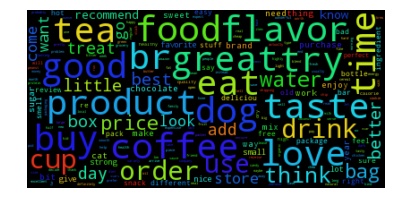

In [55]:
text=' '.join(raw_data[raw_data.helpful==0].text_lemma)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./plots/unhelpful_reviews_word_cloud.png', bbox_inches='tight')
plt.show()